시작 연도를 입력하세요 : 2010
마지막 연도를 입력하세요 : 2014
조사하고 싶은 월을 입력하세요 : 3
3월 최저기온 평균 : 
[3.1, 1.8, 3.5, 3.3, 4.6]
3월 최고기온 평균 : 
[11.1, 12.6, 12.7, 16.6, 15.3]


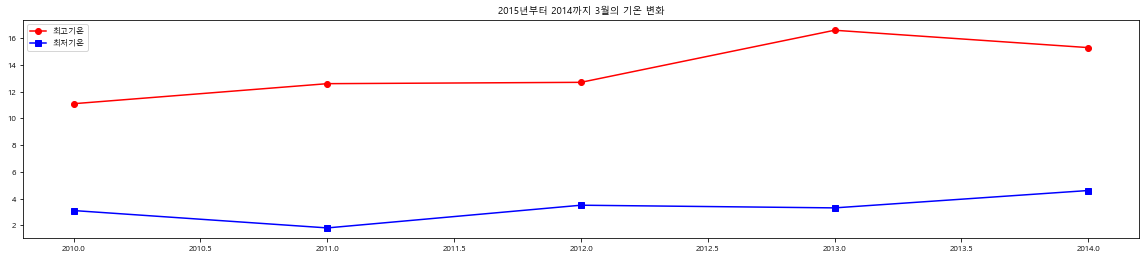

In [2]:
import csv
import matplotlib.pyplot as plt
import platform
    
high_temp=[]  # 연도별 최고온도 평균을 담는 리스트
low_temp=[]   # 연도별 최저온도 평균을 담는 리스트
x_year=[]  # 그래프 그릴 때 x축을 위한 리스트

def draw_graph_on_date(start_year, end_year, month):
    # start_year부터 end_year까지 돌리는 while문
    while start_year<=end_year:
        x_year.append(start_year)
        
        # 얘를 while문 안에 안 넣으면 데이터를 안 읽어옴
        with open('daegu_utf8.csv', encoding='utf-8') as f:
            data=csv.reader(f)
            next(data)
            
            # 하나의 년도 각 일자의 최저온도, 최고온도 담는 리스트 => 나중에 평균 계산하려고
            sub_month_low=[]
            sub_month_high=[]

            
            
            for row in data:
                my_year=int(row[0].split('-')[0])   # row의 연도
                my_month=int(row[0].split('-')[1])  # row의 월

                
                # 입력받은 년도와 row의 년도가 일치하고 입력받은 월과 row의 월이 일치한다면
                if my_year==start_year and my_month==month:
                    sub_month_low.append(float(row[-2]))
                    sub_month_high.append(float(row[-1]))
                    
            # --------------- 모든 row를 돌아서 입력받은 년, 입력받은 월의 최고온도, 최저온도를 리스트에 담았음
            
            # 연도별 최고, 최저온도 평균을 담는 리스트에 sub_month_high, sub_month_low의 평균을 계산해서 하나씩 추가
            high_temp.append(round(sum(sub_month_high)/len(sub_month_high), 1))
            low_temp.append(round(sum(sub_month_low)/len(sub_month_low), 1))

            start_year+=1
        
    # 그래프 그리기
    plt.figure(figsize=(20,4))
    plt.plot(x_year, high_temp, 'red', marker='o', label='최고기온')
    plt.plot(x_year, low_temp, 'blue', marker='s', label='최저기온')
    
    # 다른 운영체제에서도 적용할 수 있도록 한글 폰트 깨짐 방지
    if platform.system()=='Windows':
        plt.rc('font', family='Malgun Gothic', size=8)
    else:
        plt.rc('font', family='AppleGothic', size=8)
        
        print(f'{start_year}년부터 {last_year}까지 {month}월의 기온 변화')
    print(f'{month}월 최저기온 평균 : \n{low_temp}')
    print(f'{month}월 최고기온 평균 : \n{high_temp}')
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus']=False
    plt.title(f'{start_year}년부터 {end_year}까지 {month}월의 기온 변화')
    plt.legend(loc=2)
    plt.show()

                        
# 리스트 평균 구하는 함수
def my_avg(my_list):
    total=0
    for num in my_list:
        total+=num
    return total/len(my_list)
            
start_year=int(input('시작 연도를 입력하세요 : '))
end_year=int(input('마지막 연도를 입력하세요 : '))
month=int(input('조사하고 싶은 월을 입력하세요 : '))
draw_graph_on_date(start_year, end_year, month)